# Problem Set 2 with Solutions

In [2]:
# 4.1 Star Network ارتباط نجمي

    # Write a program that returns the number of edges
    # in a star network that has `n` nodes 
    #

def star_network(n):
    # return number of edges
    return n - 1


    
# Problem Set 2 Solutions
    
    # There are n-1 other nodes
    # and 1 edge for each node
    # so there are n-1 edges.

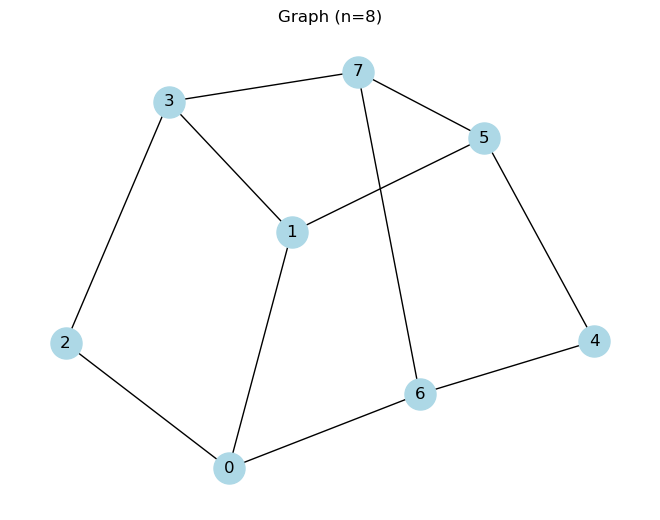

In [20]:
# 4.2 Recurrence Relation

import networkx as nx
import matplotlib.pyplot as plt  # إضافة استيراد المكتبة
import math
import random

def makeG(n):
    if n == 1:
        G = nx.Graph()
        G.add_node(0)
        return G
    
    n_half = n // 2
    
    g1 = makeG(n_half)
    g2 = makeG(n_half)
    
    G = nx.disjoint_union(g1, g2)
    
    num_links = int(math.log2(n))
    
    nodes_g1 = list(g1.nodes())
    nodes_g2 = [node + n_half for node in g2.nodes()]  # تعديل التسميات
    
    if len(nodes_g1) < num_links or len(nodes_g2) < num_links:
        raise ValueError("عدد العقد غير كافٍ")
    
    selected_g1 = random.sample(nodes_g1, num_links)
    selected_g2 = random.sample(nodes_g2, num_links)
    
    for i1, i2 in zip(selected_g1, selected_g2):
        G.add_edge(i1, i2)
    
    return G

# اختبار الدالة
n = 8
G = makeG(n)

# الرسم
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
plt.title(f"Graph (n={n})")  # plt مُعرَّفة الآن
plt.show()

# Go to Quiz ()
    # 

In [14]:
# 4.3 Subsets مجموعات فرعية

# Go to Quiz ()
    # 0. 1. XcY
    # 1. 2. YcX
    # 2. 4. Neither
    # 3. 4. Neither 
    # 4. 1. XcY
    # 5. 4. Neither
    # 6. 2. YcX
    # 7. 4. Neither



# Problem Set 2 Solutions
    
    # Planar Graph not all of them are Tree Graph.
    # Tree Graph all of them are Planar Graph.
    # Tree Graph cannot cucles/loops.
    # Rings Graph must have cucles/loops.
    # Rings Graph's edges = nodes
    # Chains Graph's edges = nodes - 1
    # Chains Graph all of them are Tree Graph.
    # Tree Graph not all of them are Chains Graph.
    # Hypercubes Graph not Rings Graph.
    # Rings Graph not Hypercubes Graph.
    # Chains Graph all of them are Grids Graph.
    # Grids Graph not all of them are Chains Graph.

In [ ]:
# 4.4 Function Comparision مقارنة الوظائف

    # Big-Theta definition: f(n) ∈ Θ(g(n)) ⟺ ∃c1, c2, n0 such that∀n > n0; 0 ≤ c1g(n) ≤ f(n) ≤ c2g(n) 
    # Big-O definition: f(n) ∈ Θ(g(n)) ⟺ ∃c1, c2, n0 such that∀n > n0; f(n) ≤ c1g(n)
        # If you're unfamiliar with this notation here's a brief review: 
            # f(n) ∈ Θ(...) indicates that f(n) is in the set Θ(...)
            # ∃a,b,c means that there exist some values a, b and c
            # ∀n means that the following expression holds for all values of n

# Go to Quiz (4n^2+(logn)^7+9n(logn)^2+n^(2/3) is)
    # 1. 
    # 2. 
    # 3. 
    # 4. 
    # 5. 
    # 6. 



# Problem Set 2 Solutions
    
    # 4n^2+(logn)^7+9n(logn)^2+n^(2/3)
        # 4n^2 = dominates.

    # Θ(n^2)
    # O(n^2)
    # O(n^3) is vaild

عدد المناطق: 9


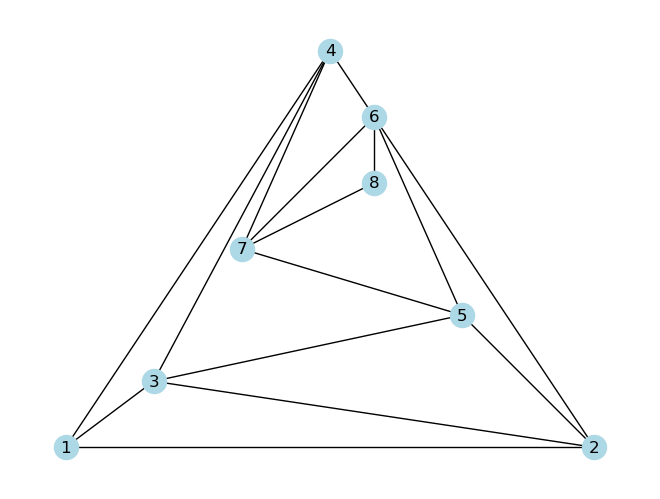

In [9]:
# 4.5 Planar Graphs الرسوم البيانية المستوية

import networkx as nx
import matplotlib.pyplot as plt

# إنشاء رسم بياني مستوٍ مع 8 عقد و15 ضلعًا (مثال)
G = nx.Graph()
nodes = list(range(1, 9))  # العقد: 1 إلى 8
edges = [
    (1,2), (1,3), (1,4), (2,3), (2,5), (3,4), (3,5),
    (4,6), (5,6), (5,7), (6,7), (6,8), (7,8), (4,7), (2,6)
]  # 15 ضلعًا (يمكن تعديلها حسب التصميم)

G.add_nodes_from(nodes)
G.add_edges_from(edges)

# حساب عدد المناطق باستخدام صيغة أويلر
v = G.number_of_nodes()
e = G.number_of_edges()
f = e - v + 2  # f = e - v + 2 (من صيغة أويلر)

print(f"عدد المناطق: {f}")

# رسم الرسم البياني (اختياري)
pos = nx.planar_layout(G)  # يَفترض أن الرسم مستوٍ
nx.draw(G, pos, with_labels=True, node_color='lightblue')
plt.show()

# Go to Quiz (How many regions does the graph have?)
    # [9]



# Problem Set 2 Solutions
    
    # Planar Graph: (n-m)+r=2

NO. of edges for n = 5:7 (Expectation=7)


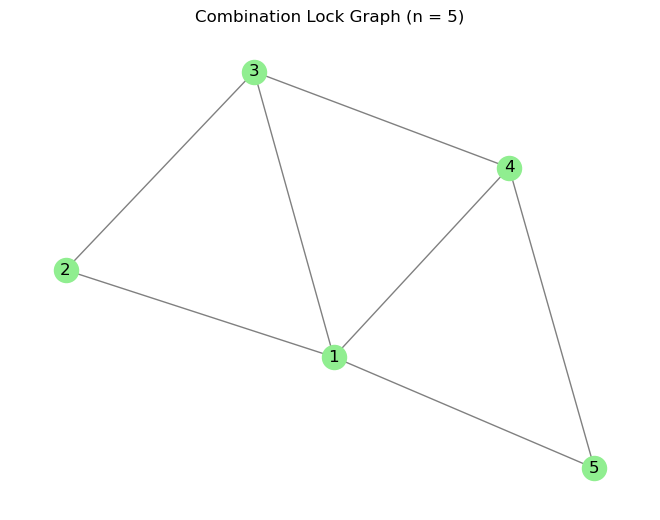

In [37]:
# 4.6 Combination Locks أقفال تركيبة

import networkx as nx
import matplotlib.pyplot as plt

def combination_lock_graph(n):
    G = nx.Graph()
    # إضافة العقد (من 1 إلى n)
    nodes = list(range(1, n+1))
    G.add_nodes_from(nodes)
    
    # إضافة أضلاع السلسلة (1-2, 2-3, ..., n-1-n)
    chain_edges = [(i, i+1) for i in range(1, n)]
    G.add_edges_from(chain_edges)
    
    # إضافة أضلاع النجمة (1 متصل ب 3, 4, ..., n)
    star_edges = [(1, j) for j in range(3, n+1)]
    G.add_edges_from(star_edges)
    
    return G

# مثال لـ n = 5
n = 5
G = combination_lock_graph(n)

# حساب عدد الأضلاع
total_edges = G.number_of_edges()
print(f"NO. of edges for n = {n}:{total_edges} (Expectation={2*n - 3})")

# رسم الرسم البياني (اختياري)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='gray')
plt.title(f"Combination Lock Graph (n = {n})")
plt.show()

# Go to Quiz (The number of edges)
    # 1. Θ(n) = 7



# Problem Set 2 Solutions
    
    # n-1 links for chain
    # n-2 for the rest (Star)
    # 2n-3 ∈ Θ(n)
    # ∀n > n0
        # c1gn < fn < c2gn

True


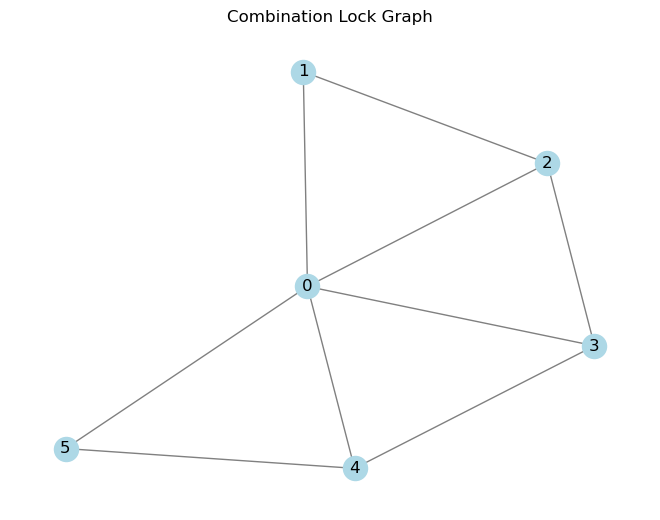

In [79]:
# 4.7 Make A Combination Lock اصنع قفلًا مركبًا

    # Generate a combination lock graph given a list of nodes
    #

def make_link(G, node1, node2):
    if node1 not in G:
        G[node1] = {}
    (G[node1])[node2] = 1
    if node2 not in G:
        G[node2] = {}
    (G[node2])[node1] = 1
    return G

def create_combo_lock(nodes):
    G = {}  # تم إصلاح المسافة البيضاء الزائدة هنا
    # إنشاء أضلاع السلسلة
    for i in range(len(nodes) - 1):
        make_link(G, nodes[i], nodes[i + 1])
    
    # إنشاء أضلاع النجمة (العقدة الأولى متصلة بالعقد من الثالثة فما فوق)
    center = nodes[0]
    for node in nodes[2:]:
        make_link(G, center, node)
    
    return G

##############
# Code for testing
#

def is_chain(graph, nodes):
    # find the first node with degree one
    start = next(n for n, e in graph.items() if len(e) == 1)  # استبدال iteritems() بـ items()
    count = 1
    seen = set([start])
    prev = None
    current = start
    while True:
        nexts = list(graph[current].keys())  # تحويل إلى list لتجنب RuntimeError
        nexts = [n for n in nexts if n != prev]
        if len(nexts) > 1:
            return False
        elif len(nexts) == 0:
            return count == len(nodes)
        prev = current
        current = nexts[0]
        if current in seen:
            return False
        seen.add(current)
        count += 1

def is_combo_lock(graph, nodes):
    center = None
    degree = 0
    for node, edges in graph.items():  # استبدال iteritems() بـ items()
        if len(edges) > degree:
            center = node
            degree = len(edges)
    if degree != len(nodes) - 1:
        return False
    chain = {}
    for node, edges in graph.items():  # استبدال iteritems() بـ items()
        if node == center:
            continue
        for e in edges:
            if e == center:
                continue
            make_link(chain, node, e)
    return is_chain(chain, [n for n in nodes if n != center])

def test():
    for n in [5, 10, 20]:
        combo = create_combo_lock(list(range(n)))  # تحويل range(n) إلى list
        if not is_combo_lock(combo, list(range(n))):
            return False
    return True

print(test())  # سيُطبع True إذا كان الكود صحيحًا



# Problem Set 2 Solutions

import networkx as nx
import matplotlib.pyplot as plt

def make_link(G, node1, node2):
    if node1 not in G:
        G[node1] = {}
    G[node1][node2] = 1
    if node2 not in G:
        G[node2] = {}
    G[node2][node1] = 1
    return G

def create_combo_lock(nodes):
    G = {}
    # إنشاء الجزء الأول من السلسلة (العقدة 0 إلى 1)
    make_link(G, nodes[0], nodes[1])
    
    # إنشاء بقية السلسلة والنجمة
    for i in range(2, len(nodes)):
        # جزء السلسلة: ربط العقدة الحالية بالسابقة
        make_link(G, nodes[i-1], nodes[i])
        # جزء النجمة: ربط العقدة 0 بالعقدة الحالية
        make_link(G, nodes[0], nodes[i])
    
    return G

# إنشاء الرسم البياني مع عقد من 0 إلى 4 كمثال
nodes = [0, 1, 2, 3, 4, 5]
G = create_combo_lock(nodes)

# تحويل القاموس إلى كائن شبكة لرسمه
graph = nx.Graph()
for node in G:
    for neighbor in G[node]:
        graph.add_edge(node, neighbor)

# رسم الرسم البياني
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Combination Lock Graph")
plt.show()

In [77]:
# 4.8 Erdos-Renyi إردوس ريني

import networkx as nx
import numpy as np

# المعلمات
n = 256       # عدد العقد
p = 0.25      # احتمال وجود حافة
num_simulations = 100  # عدد التكرارات للحصول على المتوسط

# حساب القيمة النظرية
expected_edges = (n * (n - 1) // 2) * p
print(f"القيمة النظرية للمتوسط: {expected_edges}")

# محاكاة توليد الرسوم البيانية وحساب المتوسط
edge_counts = []
for _ in range(num_simulations):
    G = nx.erdos_renyi_graph(n, p)
    edge_counts.append(G.number_of_edges())

# حساب المتوسط العملي
average_edges = np.mean(edge_counts)
print(f"المتوسط العملي بعد {num_simulations} محاولة: {average_edges:.2f}")

# Go to Quiz (How many edges will it have?)
    # [8160]



# Problem Set 2 Solutions

    # n=256  >>> p=0.25 >>> ???
        # n=4 >>> p=1 >>> 6 edges
        # NO. of edges in a clique with n nodes
        # [n(n-1)/2]*p
        # [256(256-1)/2]*0.25 = 8160

القيمة النظرية للمتوسط: 8160.0
المتوسط العملي بعد 100 محاولة: 8172.18


In [16]:
# Done (4+5)
# Lesson Rating
# You just completed (4+5)
# How was it? ()
# Suggested Improvements: 